1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

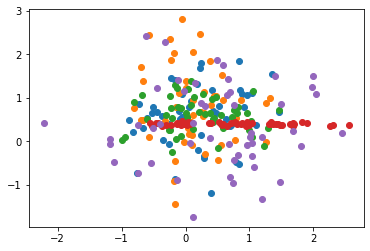

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def guass2d(mean, std):
    x = np.zeros((len(mean), 50, 2))
    for i in range(len(mean)):
        x[i] = np.random.normal(loc=mean[i], scale=std[i], size=(50, 2))
    return x


mean = np.random.random(size=(5, 2))
std = np.random.random(size=(5, 2))

point = guass2d(mean, std)

fig, ax = plt.subplots()

for i in range(len(point)):
    ax.scatter(point[i,:,0], point[i,:,1])

plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

(11131, 2)
(10489, 2)


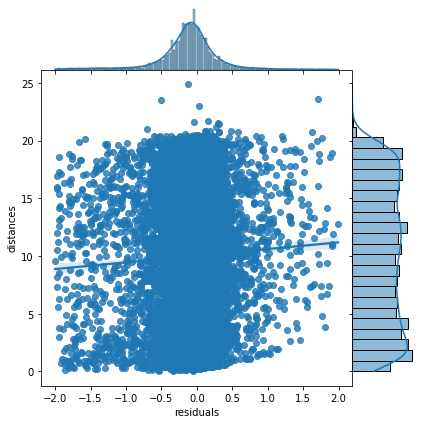

In [4]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


file_name = '/content/data/residuals_261.pkl'

infile = open(file_name, 'rb')
data = pickle.load(infile)
infile.close()

data = data.reshape(1)
df = pd.DataFrame(data[0])
print(df.shape)

clean_df = df[np.abs(df['residuals']) < 2]
print(clean_df.shape)
g = sns.jointplot(x="residuals", y="distances", data=clean_df, kind="reg", space=0)

(array([454., 774., 678., 592., 552., 558., 530., 504., 505., 548., 534.,
        540., 582., 551., 481., 515., 555., 520., 571., 474., 102.,   6.,
          1.,   3.,   1.]),
 array([ 0.   ,  0.996,  1.992,  2.988,  3.984,  4.98 ,  5.976,  6.972,
         7.968,  8.964,  9.96 , 10.956, 11.952, 12.948, 13.944, 14.94 ,
        15.936, 16.932, 17.928, 18.924, 19.92 , 20.916, 21.912, 22.908,
        23.904, 24.9  ]),
 <a list of 25 Patch objects>)

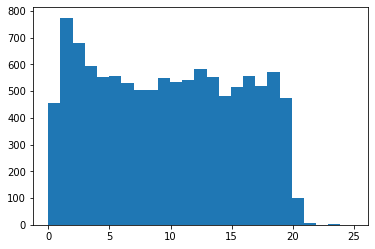

In [5]:
fix, ax = plt.subplots()

ax.hist(df['distances'], bins=25, )

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


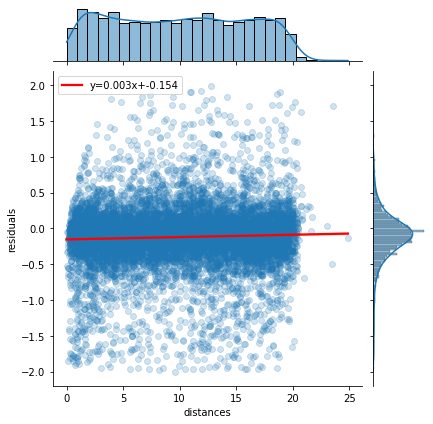

In [6]:
from scipy import stats


f = pd.read_pickle('/content/data/residuals_261.pkl')
d_pickle = np.array(f, ndmin=1)

data = d_pickle[0]

df = pd.DataFrame(data)
df = df[np.abs(df['residuals']) < 2]

slope, intercept, rvalue, pvalue, stderr = stats.linregress(df['distances'], df['residuals'])

g = sns.jointplot(x='distances', y='residuals', data=df, kind='reg',scatter_kws={'alpha':0.2},
                     line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept), 'color':'red'})


g.ax_joint.legend()